GOOGLE PLAYSTORE DATA ANALYSIS

This project analyzes a large collection of apps from the Google Play Store to understand market trends and app performance. The dataset includes information such as app category, ratings, reviews, size, installs, price, and content rating. Through data cleaning, visualization, and statistical analysis, the project extracts useful insights that can help developers and businesses improve their apps and target the right audience.

Importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

Load Dataset

In [2]:
df=pd.read_csv(r"C:\DataScience\Dataset\csv\googleplaystore.csv")

BASIC DATA INFORMATION

Displaying the First 5 Rows of the Dataset

In [3]:
print(df.head())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

Displaying the Last five Rows of Dataset

In [4]:
print(df.tail())

                                                 App             Category  \
10836                               Sya9a Maroc - FR               FAMILY   
10837               Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                         Parkinson Exercices FR              MEDICAL   
10839                  The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840  iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     NaN       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating             Genres      Last Updated         Current Ver  \
10836       Everyone          Educa

In [5]:
print(df.count())

App               10841
Category          10841
Rating             9367
Reviews           10841
Size              10841
Installs          10841
Type              10840
Price             10841
Content Rating    10840
Genres            10841
Last Updated      10841
Current Ver       10833
Android Ver       10838
dtype: int64


Shape of Dataset

In [6]:

print("\nDataset Shape (Rows, Columns): ", df.shape)



Dataset Shape (Rows, Columns):  (10841, 13)


 Display all column names present in the dataset

In [7]:
print("\nColumn Names:\n", df.columns)


Column Names:
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


Show detailed info like data types, missing values count

In [8]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Summary statistics of numeric columns (mean, median, etc.)

In [9]:
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

            Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000


Check missing values in each column

In [10]:
print("\nMissing Values in Dataset:\n")
print(df.isnull().sum())


Missing Values in Dataset:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


DATA CLEANING AND TRANSFORMATION


In [11]:
#Remove Duplicates
df.drop_duplicates(inplace=True)
print("\nAfter Removing Duplicates_>Shape",df.shape)



After Removing Duplicates_>Shape (10358, 13)


In [12]:
# Remove invalid rating values (ratings must be ≤ 5)
df = df[df['Rating'] <= 5]
print("After Removing Invalid Ratings → Shape:", df.shape)

After Removing Invalid Ratings → Shape: (8892, 13)


Convert 'Reviews' from text to numbers

In [13]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

Clean 'Installs' column → remove + and , then convert to numbers

In [14]:
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

Remove $ from Price and convert to numeric type

In [15]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

Convert Size column to numeric (bytes)

In [16]:
def convert_size(size):
    if 'M' in size:  # If size is in MB
        return float(size.replace('M','')) * 1024 * 1024  # Convert MB → Bytes
    elif 'k' in size:  # If size is in KB
        return float(size.replace('k','')) * 1024  # Convert KB → Bytes
    elif size == 'Varies with device':  # Replace text with NaN
        return np.nan
    return size  # return original value if none matches

df['Size'] = df['Size'].apply(lambda x: convert_size(str(x)))

 Convert Rating column to numeric

In [17]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')


Convert Size already cleaned to numeric

In [18]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

Filling missing values 

In [19]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df['Size'].fillna(df['Size'].median(), inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)
df['Content Rating'].fillna(df['Content Rating'].mode()[0], inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0], inplace=True)

Convert Last Updated column to actual date type

In [20]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')


Show missing values again to confirm cleaning

In [21]:
print(df.isnull().sum())


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [22]:
df.dropna(inplace=True)#Remove any remaining missing values from other columns


In [23]:
print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())#confirm cleaning


Missing Values After Cleaning:

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [24]:
print("\nDataset Shape After Cleaning: ", df.shape)


Dataset Shape After Cleaning:  (8892, 13)


FEATURE ENGINEERING

Feature engineering was performed to create additional meaningful features such as price category, updated year, size in MB, and install popularity groups to support deeper analysis.

Price Category :Free or Paid

In [25]:
df['Price_Category'] = df['Price'].apply(lambda x: 'Free' if x == 0 else 'Paid')


Year of Last Update

In [26]:
df['Updated_Year'] = df['Last Updated'].dt.year



Size in MB 

In [27]:
df['Size_MB'] = df['Size'] / (1024 * 1024)

Install Popularity Groups

In [28]:
df['Install_Group'] = pd.cut(df['Installs'],
                             bins=[0, 10000, 1000000, 50000000, 1000000000],
                             labels=['Low', 'Medium', 'High', 'Very High'])


In [29]:
print("\nFeature Engineering Completed")
print(df.head())


Feature Engineering Completed
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews        Size  Installs  Type  Price Content Rating  \
0      159  19922944.0     10000  Free    0.0       Everyone   
1      967  14680064.0    500000  Free    0.0       Everyone   
2    87510   9122611.2   5000000  Free    0.0       Everyone   
3   215644  26214400.0  50000000  Free    0.0           Teen   
4      967   2936012.8    100000  Free    0.0       Everyone   

                      Genres Last Updated         Current Ver   Android Ver  \
0               Art & De

STATISTICAL ANALYSIS

Descriptive Statistics

In [30]:
df.describe()


,Rating,Reviews,Size,Installs,Price,Updated_Year,Size_MB
count,8892.000000,8.892000e+03,8.892000e+03,8.892000e+03,8892.000000,8892.000000,8892.000000
mean,4.187877,4.727764e+05,2.233799e+07,1.648965e+07,0.963155,2017.401484,21.303167
std,0.522377,2.905052e+06,2.271015e+07,8.637600e+07,16.189341,1.116673,21.658090
min,1.000000,1.000000e+00,8.704000e+03,1.000000e+00,0.000000,2010.000000,0.008301
25%,4.000000,1.640000e+02,6.606029e+06,1.000000e+04,0.000000,2017.000000,6.300000
50%,4.300000,4.714500e+03,1.468006e+07,5.000000e+05,0.000000,2018.000000,14.000000
75%,4.500000,7.126675e+04,2.831155e+07,5.000000e+06,0.000000,2018.000000,27.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,2018.000000,100.000000


Central Tendency Measures for Rating

In [31]:
print("Mean Rating:", df['Rating'].mean())
print("Median Rating:", df['Rating'].median())
print("Mode Rating:", df['Rating'].mode()[0])


Mean Rating: 4.187876743139901
Median Rating: 4.3
Mode Rating: 4.4


Comparison: Free vs Paid Apps

In [32]:
print("Average Rating - Free Apps:", df[df['Type']=='Free']['Rating'].mean())
print("Average Rating - Paid Apps:", df[df['Type']=='Paid']['Rating'].mean())


Average Rating - Free Apps: 4.182425413697305
Average Rating - Paid Apps: 4.261500815660685


Install Count by App Category

In [33]:
total_installs_cat = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
print(total_installs_cat.head(5))


Category
GAME             31543862717
COMMUNICATION    24152241530
SOCIAL           12513841475
PRODUCTIVITY     12463070180
TOOLS            11450724500
Name: Installs, dtype: int64


Conditional Statistics (AND / OR Operations)

Apps with Rating > 4 AND Installs > 1M

In [34]:
high_popular = df[(df['Rating'] > 4) & (df['Installs'] > 1000000)]
print("Count:", len(high_popular))


Count: 2209


Apps that are Paid OR Rating > 4.5

In [35]:
cond_apps = df[(df['Type'] == 'Paid') | (df['Rating'] > 4.5)]
print("Count:", len(cond_apps))


Count: 2253


Free apps OR Rating < 3

In [36]:
apps2 = df[(df['Type'] == 'Free') | (df['Rating'] < 3)]
print("Count:", len(apps2))


Count: 8301


Group Statistics — Based on Rating Range

In [37]:
df['Rating_Group'] = pd.cut(df['Rating'], bins=[0,3,4,5], labels=['Low', 'Medium', 'High'])
print(df.groupby('Rating_Group')['Installs'].mean())


Rating_Group
Low       1.680993e+05
Medium    8.374497e+06
High      2.009900e+07
Name: Installs, dtype: float64


Paid apps with Price > 200 BUT Rating < 4

In [38]:
apps3 = df[(df['Type'] == 'Paid') & (df['Price'] > 200) & (df['Rating'] < 4)]
print("Count:", len(apps3))


Count: 8


Apps with Low Rating (< 3.5) but High Installs (> 1M)

In [39]:
apps9 = df[(df['Rating'] < 3.5) & (df['Installs'] > 1000000)]
print("Low rating but installed a lot:", len(apps9))


Low rating but installed a lot: 39


NOT Games → Max Rating

In [40]:
apps6 = df[df['Category'] != 'GAME']
print("Highest Rating in non-game apps:", apps6['Rating'].max())


Highest Rating in non-game apps: 5.0


Free apps with reviews > 50K

In [41]:
apps7 = df[(df['Type'] == 'Free') & (df['Reviews'] > 50000)]
print("Apps:", len(apps7))
print("Average Rating:", apps7['Rating'].mean())


Apps: 2502
Average Rating: 4.3575939248601125


Paid apps: Avg Price grouped by Content Rating

In [42]:
print(df[df['Type'] == 'Paid'].groupby('Content Rating')['Price'].mean())


Content Rating
Everyone        14.789808
Everyone 10+     4.584062
Mature 17+       6.321250
Teen            13.907556
Name: Price, dtype: float64


DATA VISUALIZATION

Plot distribution of ratings (shows how many apps fall into each rating)

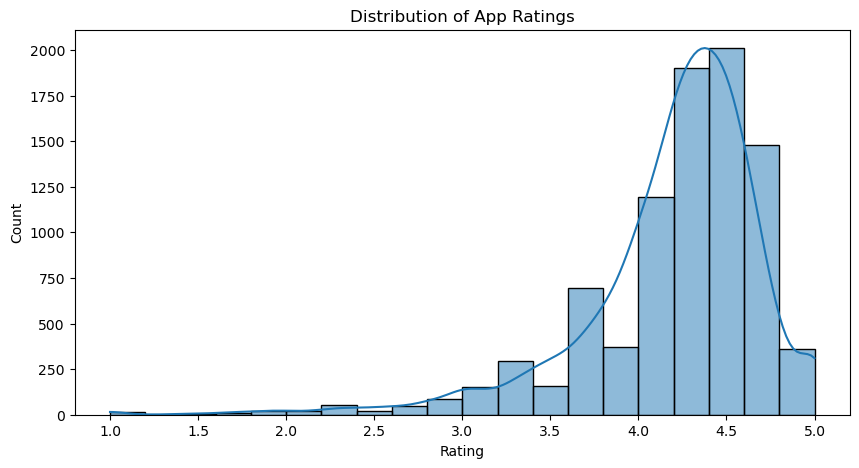

In [43]:
plt.figure(figsize=(10,5))
sns.histplot(df['Rating'], kde=True, bins=20)
plt.title("Distribution of App Ratings")
plt.show()

Show top 10 categories with the highest number of apps

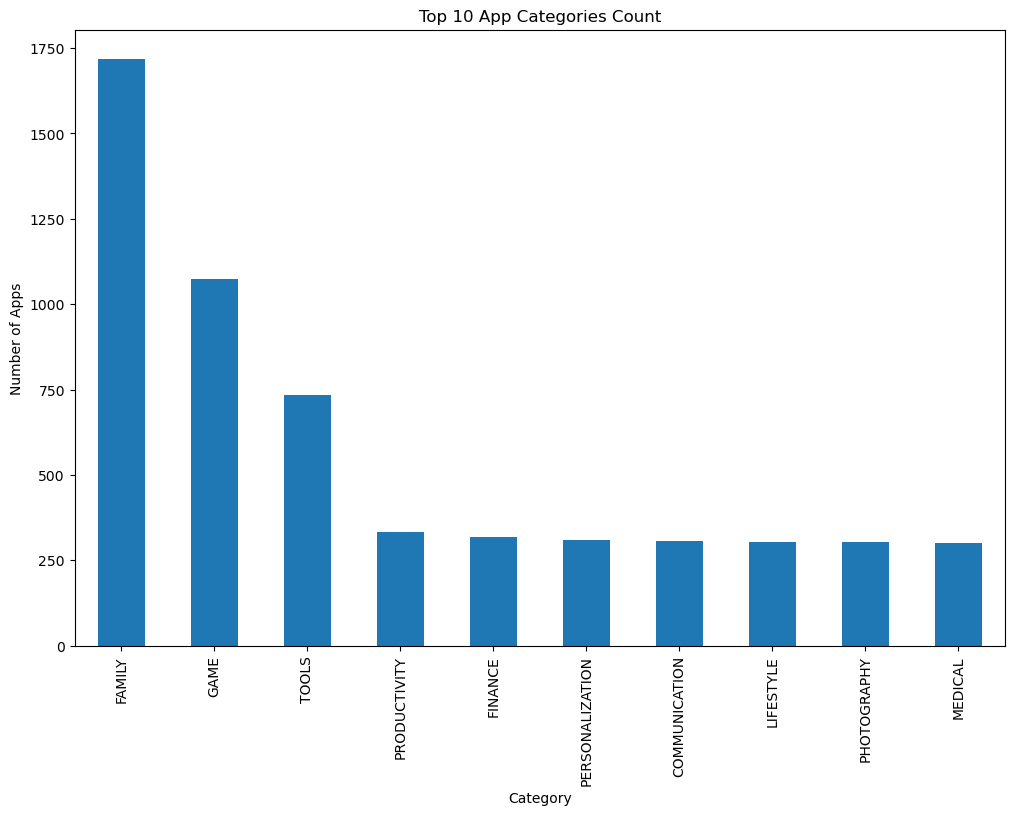

In [44]:
plt.figure(figsize=(12,8))
df['Category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 App Categories Count")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.show()


Plot Relationship between Installs and Rating

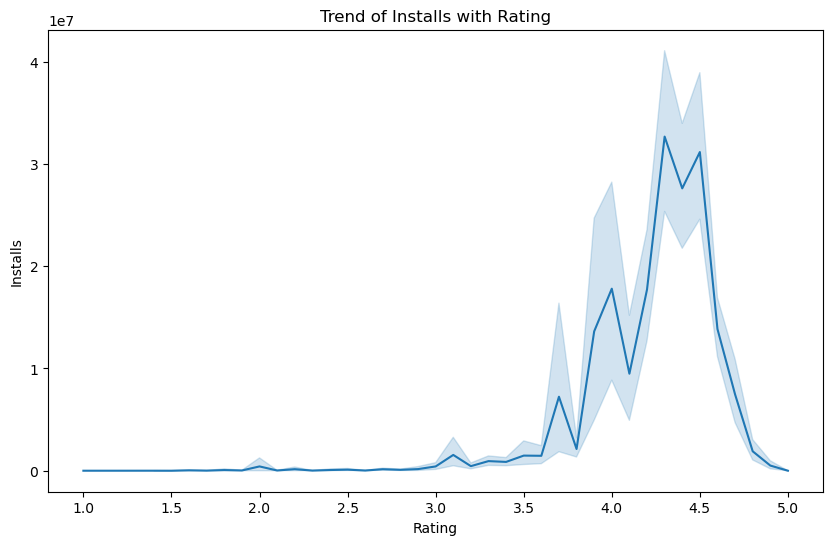

In [45]:
df_sorted = df.sort_values(by='Rating')

plt.figure(figsize=(10,6))
sns.lineplot(x='Rating', y='Installs', data=df_sorted)
plt.title("Trend of Installs with Rating")
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.show()


Category vs Rating

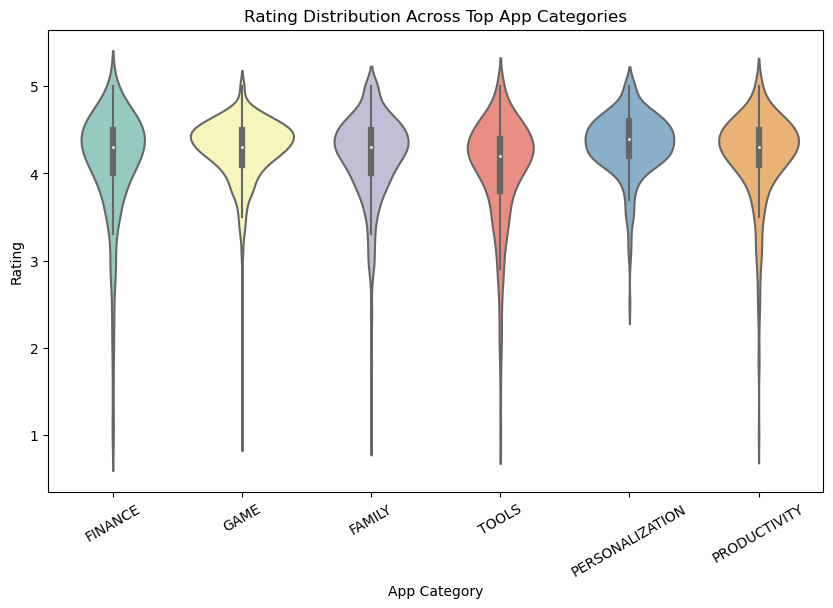

In [46]:
# Select top 6 categories with highest number of apps
top_categories = df['Category'].value_counts().head(6).index
df_top_cat = df[df['Category'].isin(top_categories)]

plt.figure(figsize=(10,6))
sns.violinplot(x='Category', y='Rating', data=df_top_cat, palette='Set3')
plt.title('Rating Distribution Across Top App Categories')
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.xticks(rotation=30)
plt.show()


Plot Reviews vs Rating relationship

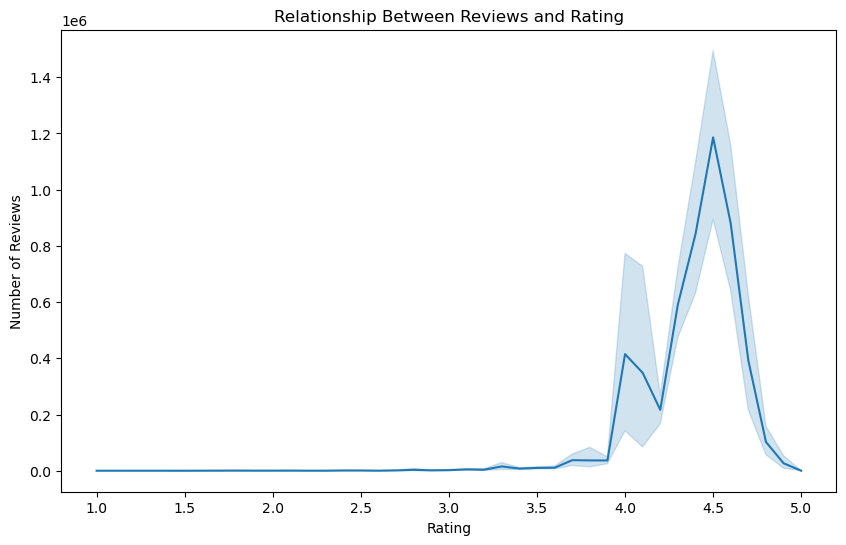

In [47]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Rating', y='Reviews', data=df)
plt.title("Relationship Between Reviews and Rating")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()


Free vs Paid Apps

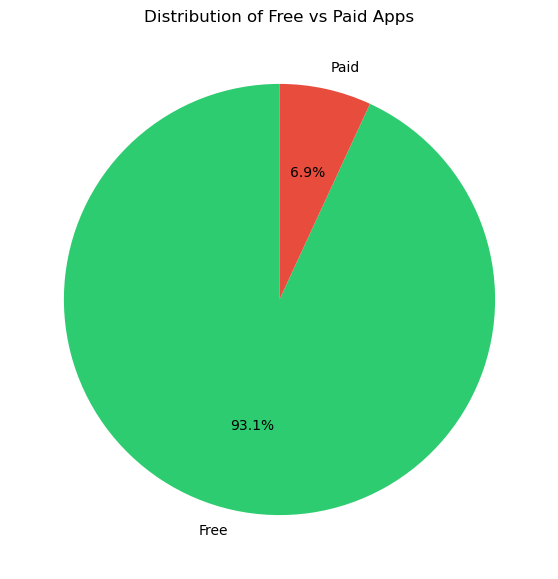

In [48]:

plt.figure(figsize=(7,7))
colors=['#2ecc71','#e74c3c']
df['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=colors)
plt.title("Distribution of Free vs Paid Apps")
plt.ylabel("") 
plt.show()

Ratings Comparison of Free vs Paid

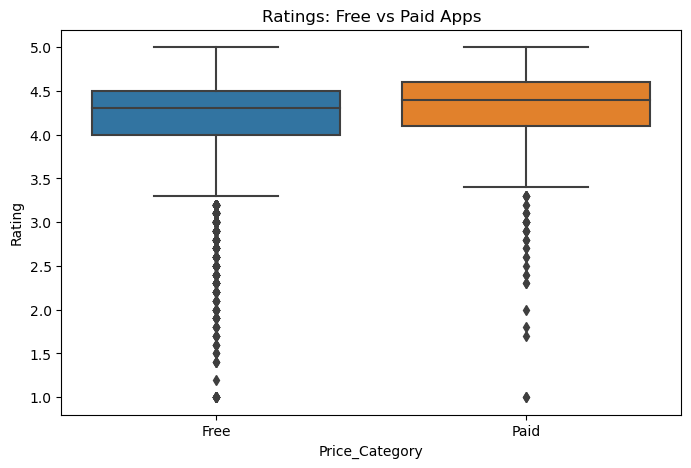

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Price_Category', y='Rating', data=df)
plt.title("Ratings: Free vs Paid Apps")
plt.show()


Revenue Analysis of Paid Apps


Top 10 Revenue Generating Apps:

                                App     Category   Price  Installs  \
4347                      Minecraft       FAMILY    6.99  10000000   
2241                      Minecraft       FAMILY    6.99  10000000   
5351                      I am rich    LIFESTYLE  399.99    100000   
5356              I Am Rich Premium      FINANCE  399.99     50000   
4034                  Hitman Sniper         GAME    0.99  10000000   
7417  Grand Theft Auto: San Andreas         GAME    6.99   1000000   
2883            Facetune - For Free  PHOTOGRAPHY    5.99   1000000   
5578        Sleep as Android Unlock    LIFESTYLE    5.99   1000000   
8804            DraStic DS Emulator         GAME    4.99   1000000   
4367       I'm Rich - Trump Edition    LIFESTYLE  400.00     10000   

      Estimated Revenue  
4347         69900000.0  
2241         69900000.0  
5351         39999000.0  
5356         19999500.0  
4034          9900000.0  
7417          6990000.0  
2883         

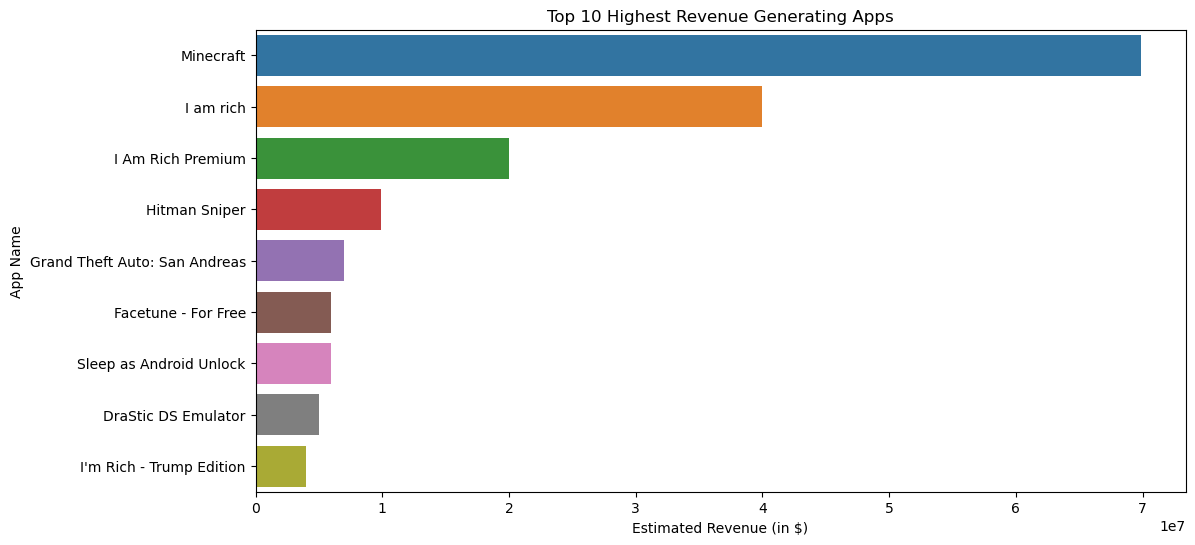

In [50]:
paid_apps = df[df['Price'] > 0].copy()
#Calculate Estimated Revenue = Price × Installs
paid_apps['Estimated Revenue'] = paid_apps['Price'] * paid_apps['Installs']
#Display Top 10 Revenue Generating Apps
top_revenue_apps = paid_apps.sort_values(by='Estimated Revenue', ascending=False).head(10)
print("\nTop 10 Revenue Generating Apps:\n")
print(top_revenue_apps[['App', 'Category', 'Price', 'Installs', 'Estimated Revenue']])
plt.figure(figsize=(12,6))
sns.barplot(x='Estimated Revenue', y='App', data=top_revenue_apps)
plt.title("Top 10 Highest Revenue Generating Apps")
plt.xlabel("Estimated Revenue (in $)")
plt.ylabel("App Name")
plt.show()

CORRELATION ANALYSIS

Heatmap showing correlation between numeric variables

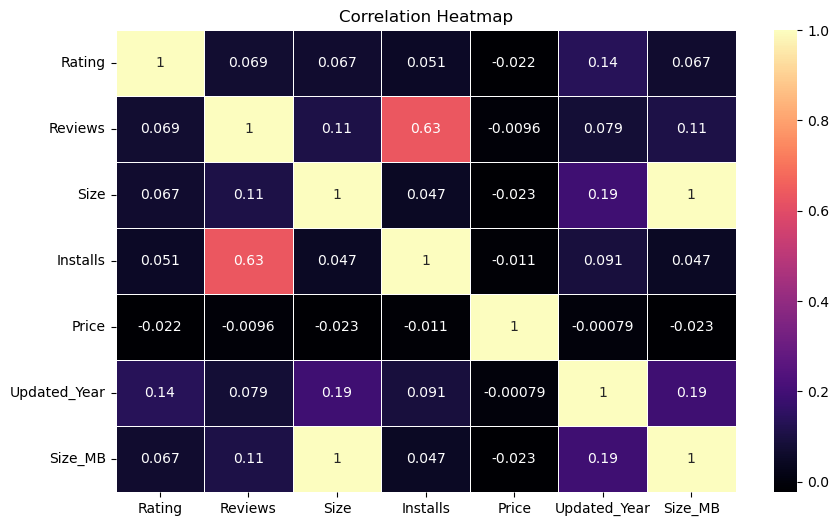

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='magma')
plt.title("Correlation Heatmap")
plt.show()

Category-wise Correlation

               Category_Code    Rating  Installs
Category_Code       1.000000 -0.037955  0.033196
Rating             -0.037955  1.000000  0.050886
Installs            0.033196  0.050886  1.000000


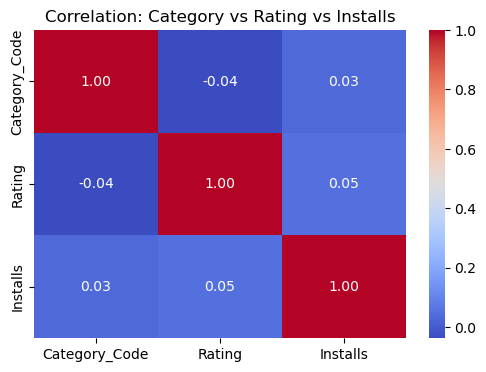

In [52]:
# Encode category to numeric
df['Category_Code'] = df['Category'].astype('category').cat.codes

cat_corr = df[['Category_Code','Rating','Installs']].corr()
print(cat_corr)
plt.figure(figsize=(6,4))
sns.heatmap(cat_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation: Category vs Rating vs Installs")
plt.show()


RELATIONSHIP AND TREND ANALYSIS

What relationship did you observe between Rating and Installs?

There is a positive relationship.
When the Rating increases Installs also increase.
Users trust and download apps having higher ratings.

How did you analyze the relationship between Rating and Installs?

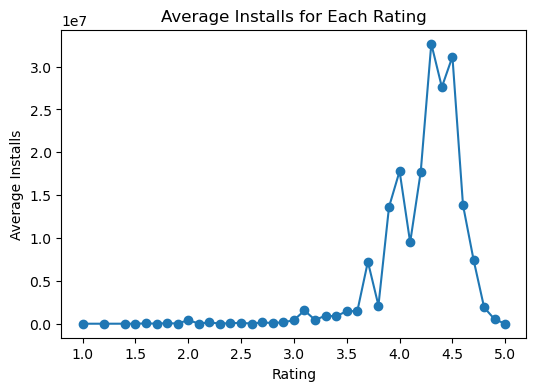

In [58]:
avg_installs = df.groupby('Rating')['Installs'].mean()

plt.figure(figsize=(6,4))
plt.plot(avg_installs.index, avg_installs.values, marker='o')
plt.title("Average Installs for Each Rating")
plt.xlabel("Rating")
plt.ylabel("Average Installs")
plt.show()


What trend do you observe between App Type and Installs?

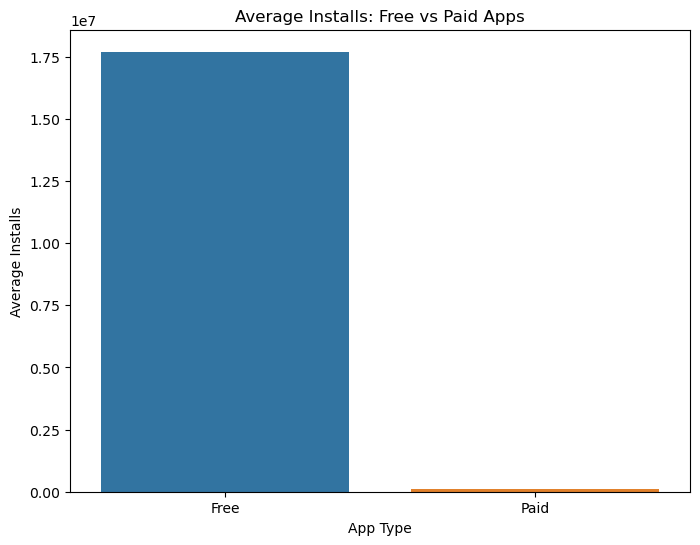

In [54]:
avg_installs_type = df.groupby('Type')['Installs'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Type', y='Installs', data=avg_installs_type)
plt.title("Average Installs: Free vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Average Installs")
plt.show()


Do High-rated apps have higher Installs on average?

In [55]:
df['Rating_Group'] = pd.cut(df['Rating'], bins=[0,3,4,5], labels=['Low','Medium','High'])
trend = df.groupby('Rating_Group')['Installs'].mean()
print(trend)


Rating_Group
Low       1.680993e+05
Medium    8.374497e+06
High      2.009900e+07
Name: Installs, dtype: float64


Which variable most strongly influences Installs?

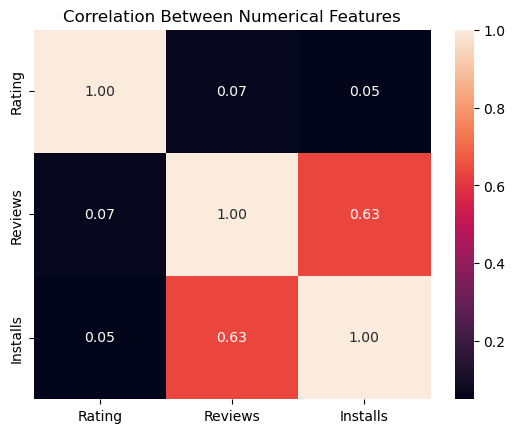

In [56]:
corr = df[['Rating','Reviews','Installs']].corr()
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title("Correlation Between Numerical Features")
plt.show()


What relationship exists between Price and Installs?

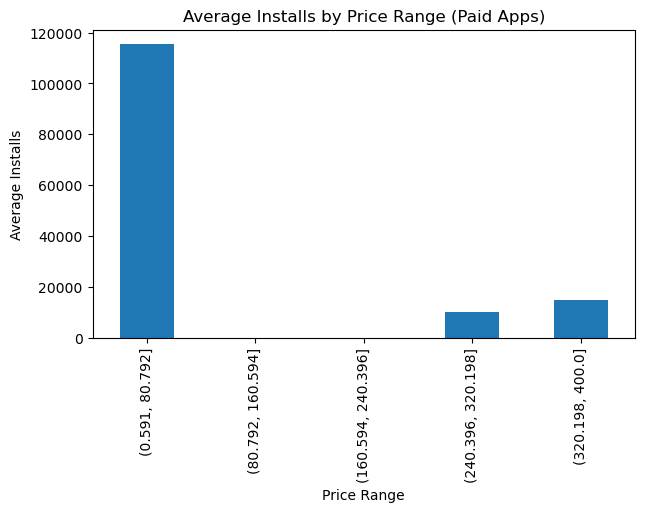

In [61]:
paid_apps = df[df['Price'] > 0]

price_bins = pd.cut(paid_apps['Price'], bins=5)
avg_installs = paid_apps.groupby(price_bins)['Installs'].mean()

plt.figure(figsize=(7,4))
avg_installs.plot(kind='bar')
plt.title("Average Installs by Price Range (Paid Apps)")
plt.xlabel("Price Range")
plt.ylabel("Average Installs")
plt.show()


CONCLUSION

This project helped us understand the Google Play Store apps by analyzing their ratings, installs, size, price, and categories. From the analysis, we found that most apps are free and belong to categories like Games and Tools. Apps with higher ratings usually get more installs. Paid apps are fewer but some of them can earn high revenue. Updating apps regularly and maintaining good ratings are important for better performance in the Play Store.
